![title](../images/r_sq.gif "ShowMyImage")


In statistics, linear regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.  
 The case of one explanatory variable is called simple linear regression. For more than 1 , it is called multiple regression


these models are often fitted using the least square approach, but they may also be fitted in other ways, such as minimizing the "lack of fit"  in some other norm  
(as with least abs deviations regression) or by minimizing a penalized version of the least squares loss func as L2 or L1.  
conversely, the least squares approach can be used to fit models that are not linear models, thus, although the terms "least squares" and "linear models" are closely linked, they are not synonymous

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/us_housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe(percentiles=[0.1,0.25,0.5,.75,.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

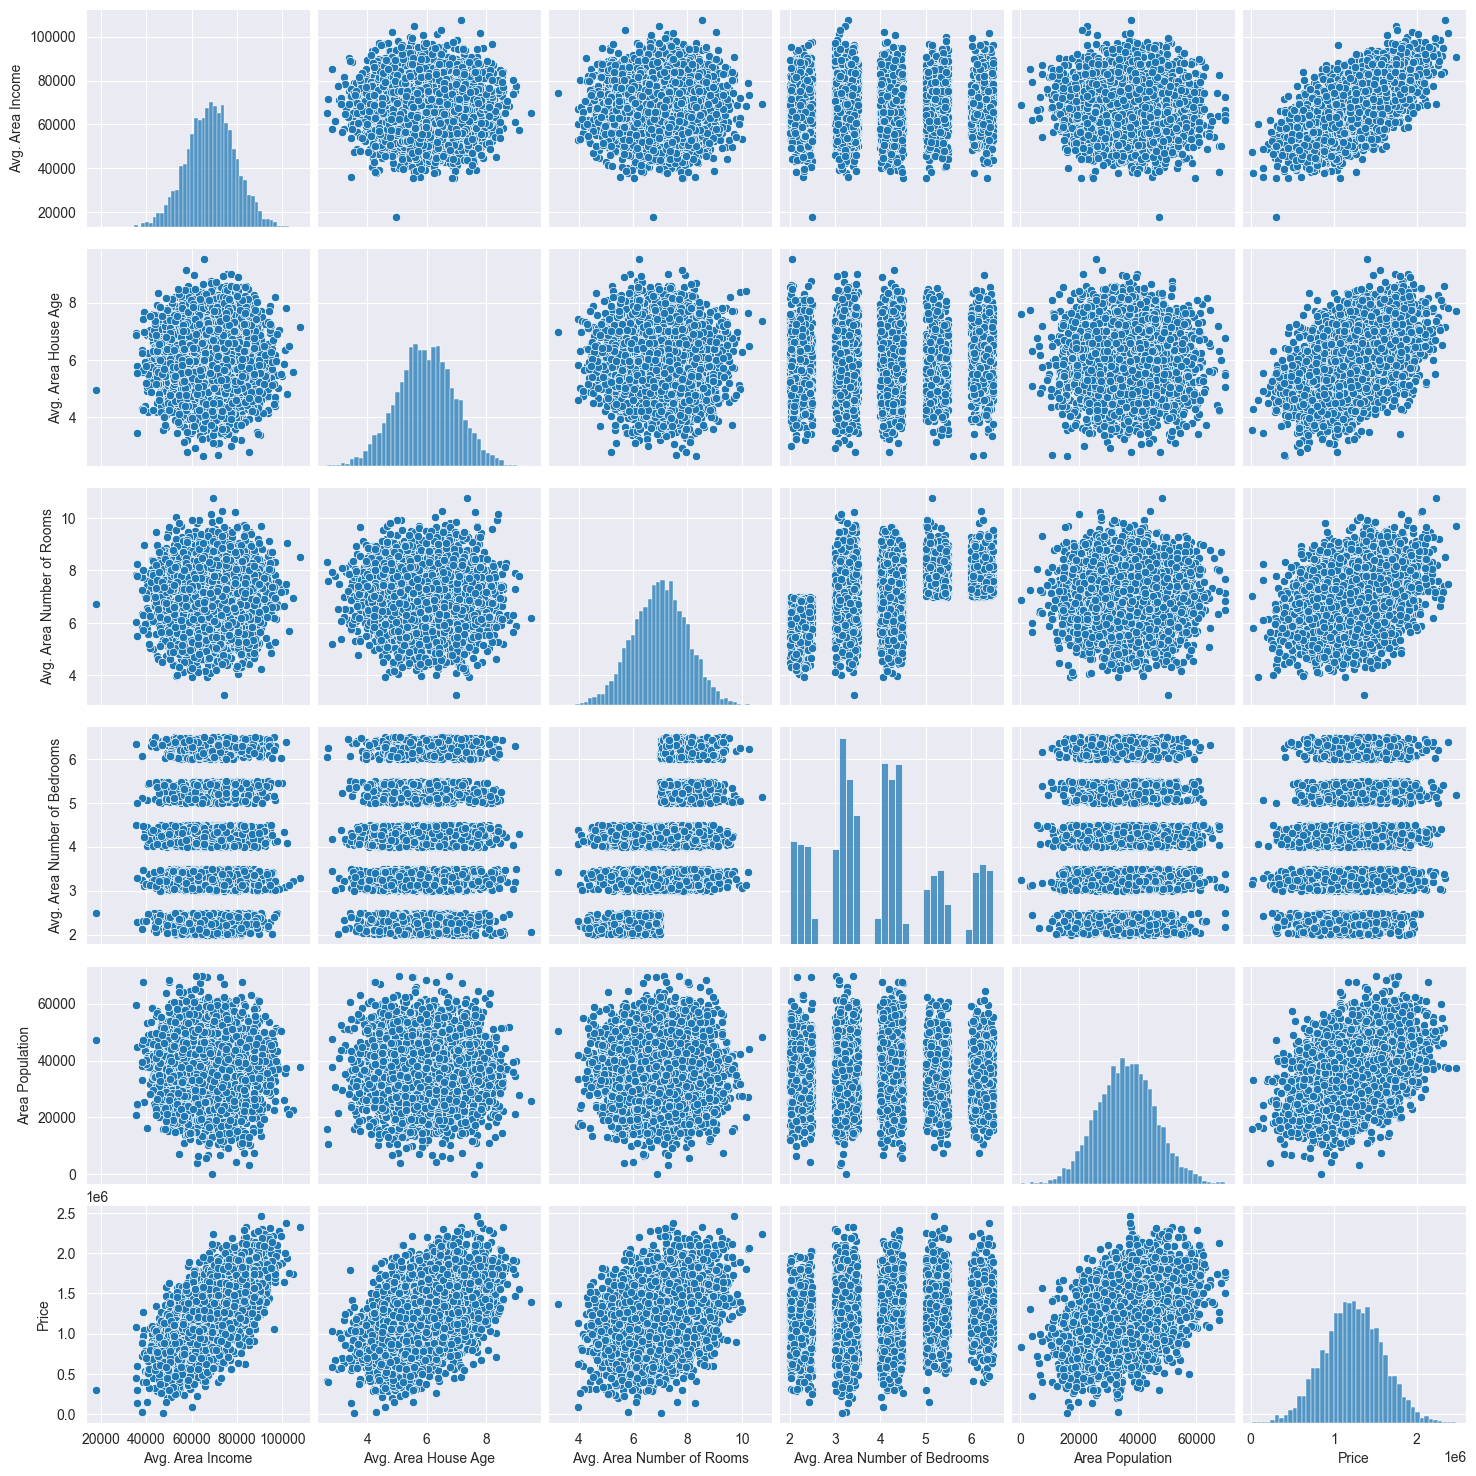

In [6]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

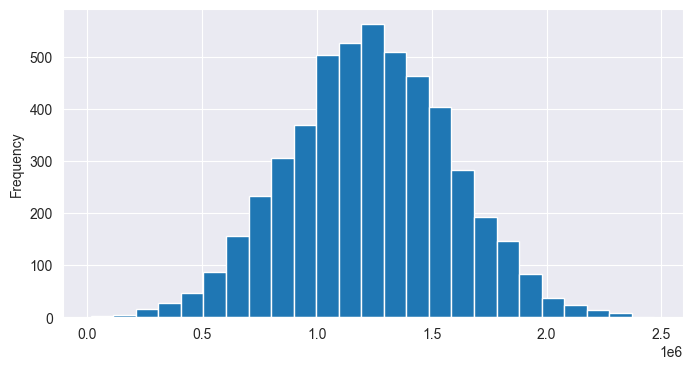

In [7]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

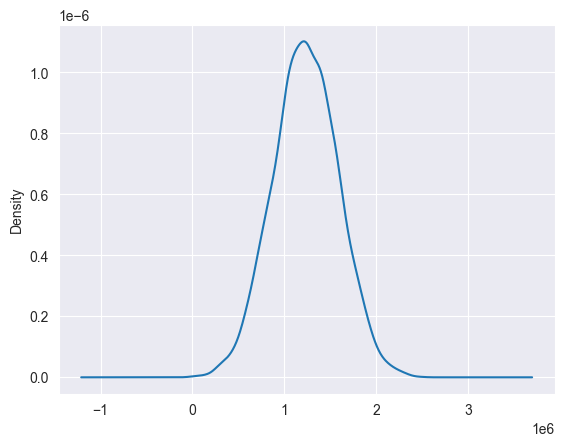

In [8]:
df['Price'].plot.density()

<Axes: >

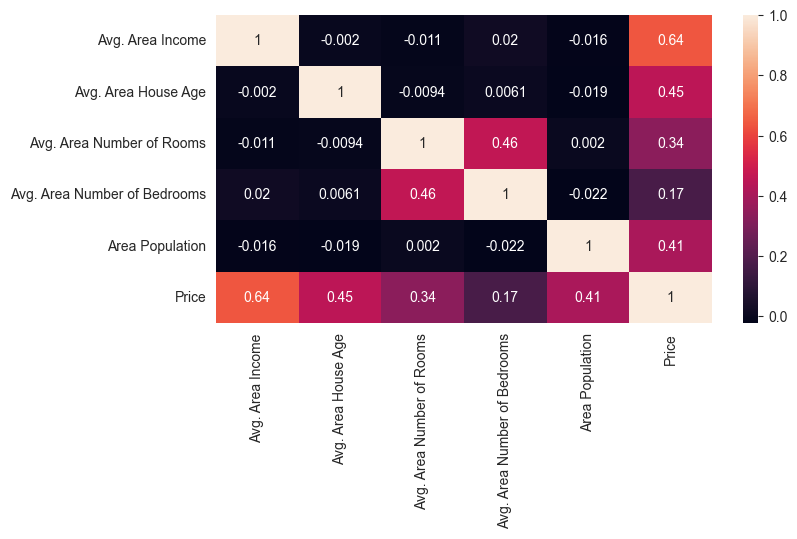

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [10]:
cols_list = list(df.columns)
feature_len=len(cols_list)
cols_list

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

#### Put all numeric in X, price in y, ignore address which is a string

In [11]:
X=df.iloc[:,:-2]
y=df.drop(columns='Address').iloc[:,-1]


In [12]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [13]:
print(f"{X.shape=}, {y.shape=}")

X.shape=(5000, 5), y.shape=(5000,)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=123)

In [16]:
print(f"{X_train.shape=}, {y_train.shape=}, {X_test.shape=}, {y_test.shape=}")

X_train.shape=(3500, 5), y_train.shape=(3500,), X_test.shape=(1500, 5), y_test.shape=(1500,)


In [17]:
#Model fit and training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Check intercept and coefficients 

In [20]:
print(lm.intercept_)

-2631028.90174549


In [21]:
print(lm.coef_)

[2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [22]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4036,74279.926228,6.929481,7.369607,5.40,26947.152504
2883,56957.835209,5.969854,5.935709,2.05,29498.964187
4162,77453.479788,5.909818,7.640186,3.02,53100.278674
4640,77906.185182,6.537044,9.458466,3.08,31399.756830
2430,62472.158580,6.704512,7.665173,6.48,37618.676554


In [23]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf.head()

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


In [24]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4036,74279.926228,6.929481,7.369607,5.40,26947.152504
2883,56957.835209,5.969854,5.935709,2.05,29498.964187
4162,77453.479788,5.909818,7.640186,3.02,53100.278674
4640,77906.185182,6.537044,9.458466,3.08,31399.756830
2430,62472.158580,6.704512,7.665173,6.48,37618.676554
...,...,...,...,...,...
1593,71920.678777,6.726673,7.614547,6.17,26341.095572
4060,69686.320170,5.367355,8.329115,5.41,41007.660003
1346,48362.981952,6.151660,8.252002,4.19,49354.129732
3454,72029.312855,7.072146,5.378450,3.41,42143.262812


In [23]:
### Calculation of std errors and t-statistics for the coefficients

In [25]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
residuals = y_train - train_pred
RSS = np.sum(np.square(residuals))
#variance in residuals
sigma_sq = RSS / dfN

#std error for each coef
se=[]
for col in X_train.columns:
    x=X_train[col]
    se_i=np.sqrt(sigma_sq/(np.sum((x - x.mean()) ** 2)))
    se.append(se_i)
    
#add coeff dataframe
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']
cdf



,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [26]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

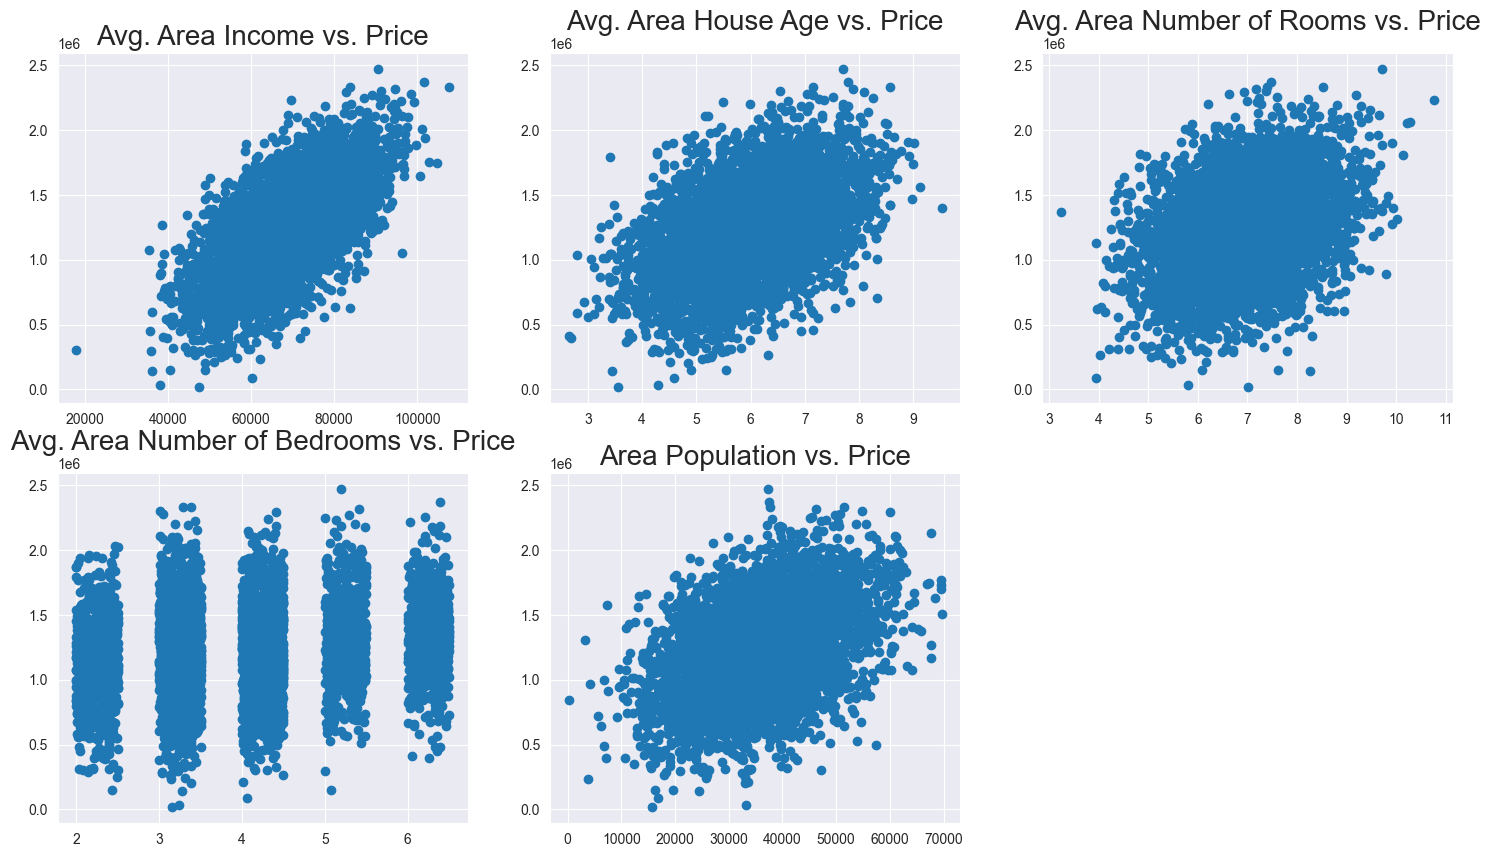

In [27]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

## R-square of the model fit

In [29]:
round(metrics.r2_score(y_train,train_pred),3)

0.917


Prediction, error estimate, and regression evaluation matrices

Prediction using the lm model


In [30]:
predictions = lm.predict(X_test)
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(1500,)


Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line

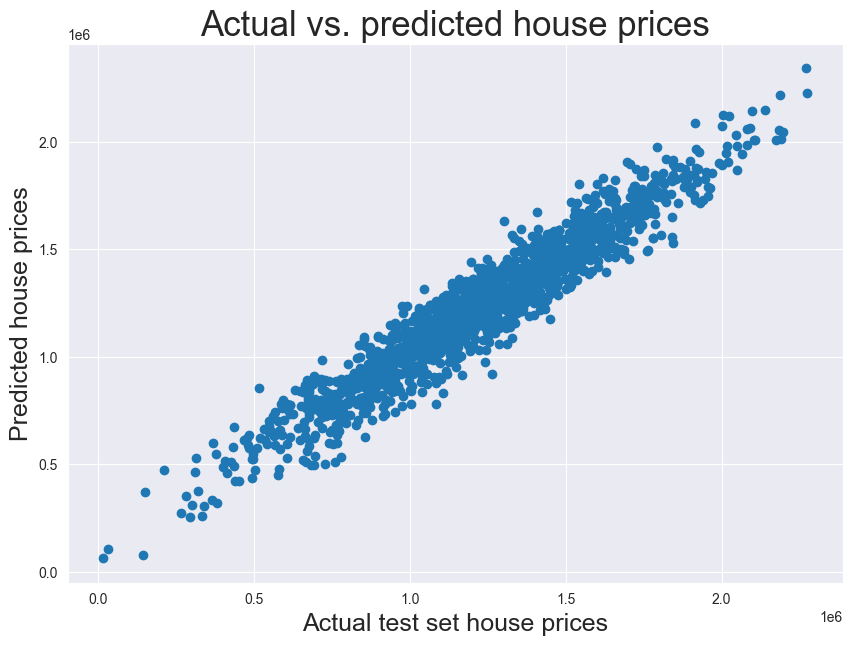

In [31]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions);



Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)


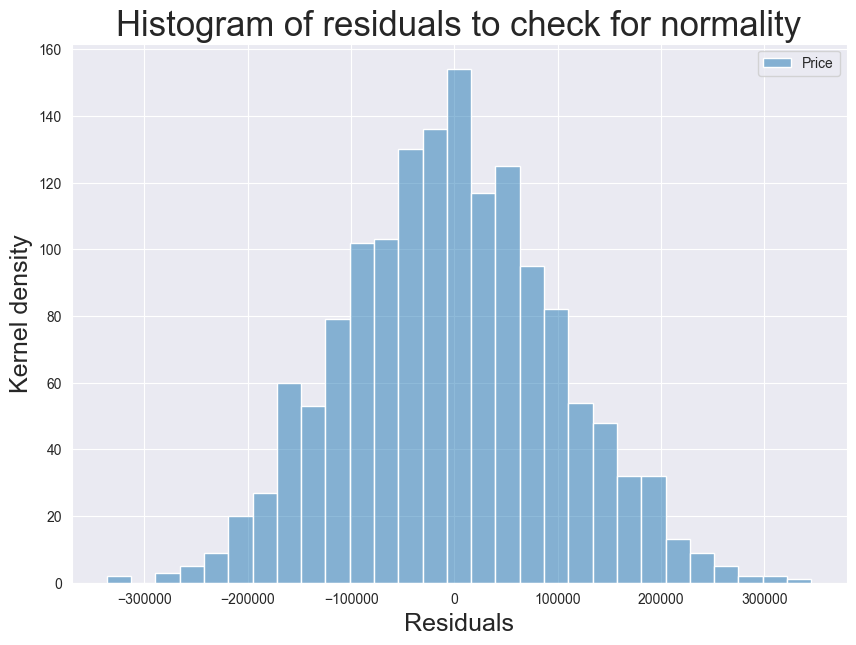

In [34]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions]);



Scatter plot of residuals and predicted values (Homoscedasticity)


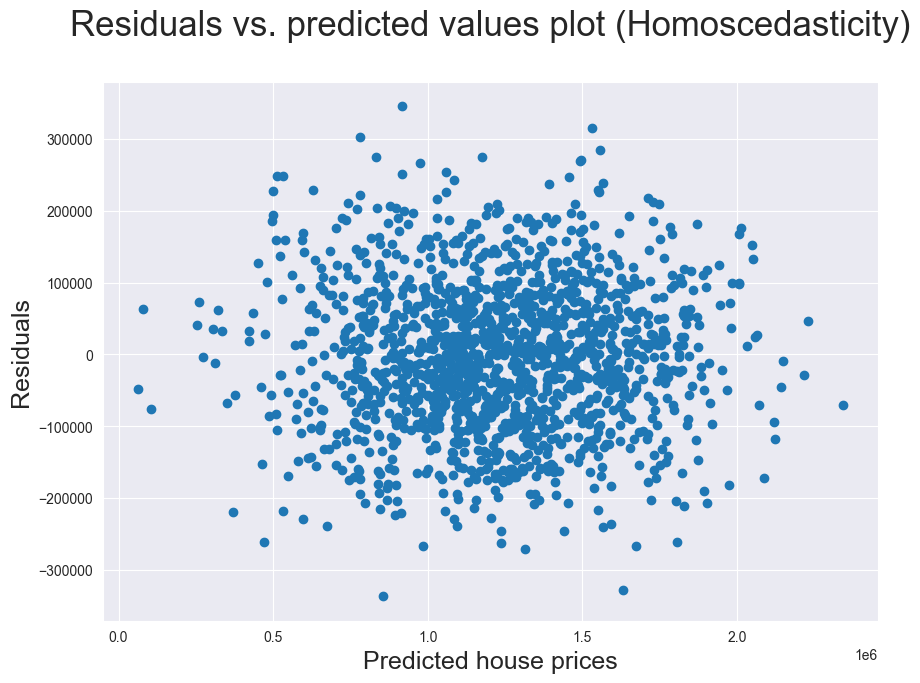

In [35]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions);

#### 

Regression evaluation metrices


In [36]:
print(f"MAE = {metrics.median_absolute_error(y_test,predictions)}")
print(f"MSE = {metrics.mean_squared_error(y_test,predictions)}")
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")

MAE = 69695.28580985544
MSE = 10489638335.804985
RMSE = 102418.9354358118


R-square-value

In [37]:
print(f"R-square value {round(metrics.r2_score(y_test,predictions),3)}")

R-square value 0.919
